In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sns.set(style="whitegrid", context="notebook")

# directory to save figures
FIG_DIR = Path("../Figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)


def savefig(name, dpi=300, bbox_inches="tight"):
    """Save current matplotlib figure to the figures directory."""
    plt.savefig(FIG_DIR / name, dpi=dpi, bbox_inches=bbox_inches)

In [3]:
df = pd.read_csv("../Data/Processed/renttherunway_clean.csv")
df.head()

,user_id,item_id,fit,fit_label,height_inches,weight_lbs,bmi,bust_band,cup_size_letter,cup_size_num,...,body_type,body_type_num,rented_for,rented_for_num,rating,review_summary,review_text,review_date,review_year,review_month
0,420272,2260466,fit,1,68.0,137.0,20.828503,34.0,d,4.0,...,hourglass,3.0,vacation,6.0,10.0,So many compliments!,An adorable romper! Belt and zipper were a lit...,2016-04-20,2016,4
1,273551,153475,fit,1,66.0,132.0,21.303030,34.0,b,2.0,...,straight & narrow,6.0,other,3.0,10.0,I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,2013-06-18,2013,6
2,360448,1063761,fit,1,64.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,party,4.0,10.0,It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,2015-12-14,2015,12
3,909926,126335,fit,1,65.0,135.0,22.462722,34.0,c,3.0,...,pear,4.0,formal affair,2.0,8.0,Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,2014-02-12,2014,2
4,151944,616682,fit,1,69.0,145.0,21.410418,34.0,b,2.0,...,athletic,1.0,wedding,7.0,10.0,Was in love with this dress !!!,I have always been petite in my upper body and...,2016-09-26,2016,9


In [4]:
df.columns

Index(['user_id', 'item_id', 'fit', 'fit_label', 'height_inches', 'weight_lbs',
       'bmi', 'bust_band', 'cup_size_letter', 'cup_size_num', 'size', 'age',
       'category', 'body_type', 'body_type_num', 'rented_for',
       'rented_for_num', 'rating', 'review_summary', 'review_text',
       'review_date', 'review_year', 'review_month'],
      dtype='str')

In [5]:
df.info()
df.describe(include="all").T.head(20)

<class 'pandas.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          192544 non-null  int64  
 1   item_id          192544 non-null  int64  
 2   fit              192544 non-null  str    
 3   fit_label        192544 non-null  int64  
 4   height_inches    191867 non-null  float64
 5   weight_lbs       162562 non-null  float64
 6   bmi              162118 non-null  float64
 7   bust_band        174133 non-null  float64
 8   cup_size_letter  174133 non-null  str    
 9   cup_size_num     174133 non-null  float64
 10  size             192544 non-null  int64  
 11  age              191584 non-null  float64
 12  category         192544 non-null  str    
 13  body_type        177907 non-null  str    
 14  body_type_num    177907 non-null  float64
 15  rented_for       192534 non-null  str    
 16  rented_for_num   192534 non-null  float64
 17  ra

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,192544.0,NaN,NaN,NaN,499494.100149,289059.719328,9.0,250654.25,499419.0,750974.0,999997.0
item_id,192544.0,NaN,NaN,NaN,1045683.600299,805314.802324,123373.0,195076.0,948396.0,1678888.0,2966087.0
fit,192544,3,fit,142058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fit_label,192544.0,NaN,NaN,NaN,0.994432,0.512031,0.0,1.0,1.0,1.0,2.0
height_inches,191867.0,NaN,NaN,NaN,65.310621,2.66348,54.0,63.0,65.0,67.0,78.0
weight_lbs,162562.0,NaN,NaN,NaN,137.391709,21.899967,50.0,123.0,135.0,148.0,300.0
bmi,162118.0,NaN,NaN,NaN,22.670947,3.380015,8.06933,20.372405,21.96875,24.126627,54.527435
bust_band,174133.0,NaN,NaN,NaN,34.201271,1.745246,28.0,34.0,34.0,36.0,48.0
cup_size_letter,174133,12,c,49634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cup_size_num,174133.0,NaN,NaN,NaN,2.958239,1.158004,0.0,2.0,3.0,4.0,10.0


In [6]:
# numeric measurement / encoded columns to use for K-Means
num_cols = [
    "height_inches",
    "weight_lbs",
    "bmi",
    "bust_band",
    "cup_size_num",
    "age",
    "body_type_num",
    "rented_for_num",
    "rating",
]

X = df[num_cols].dropna(how="any")  # drop rows with any missing among these
print("X shape:", X.shape)
X.head()

X shape: (146381, 9)


,height_inches,weight_lbs,bmi,bust_band,cup_size_num,age,body_type_num,rented_for_num,rating
0,68.0,137.0,20.828503,34.0,4.0,28.0,3.0,6.0,10.0
1,66.0,132.0,21.303030,34.0,2.0,36.0,6.0,3.0,10.0
3,65.0,135.0,22.462722,34.0,3.0,34.0,4.0,2.0,8.0
4,69.0,145.0,21.410418,34.0,2.0,27.0,1.0,7.0,10.0
5,68.0,138.0,20.980536,32.0,2.0,45.0,1.0,0.0,8.0


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[ 1.02922875, -0.00974323, -0.54839955, -0.06506463,  0.93824735,
        -0.75060497,  0.00776942,  0.66896464,  0.63846477],
       [ 0.2771288 , -0.24186834, -0.40524796, -0.06506463, -0.80058389,
         0.23544381,  1.80823756, -0.52556689,  0.63846477],
       [-0.09892117, -0.10259327, -0.05540116, -0.06506463,  0.06883173,
        -0.01106839,  0.60792547, -0.92374406, -0.75250281],
       [ 1.40527872,  0.36165695, -0.37285208, -0.06506463, -0.80058389,
        -0.87386107, -1.19254267,  1.06714182,  0.63846477],
       [ 1.02922875,  0.0366818 , -0.50253545, -1.24016958, -0.80058389,
         1.34474869, -1.19254267, -1.72009842, -0.75250281]])

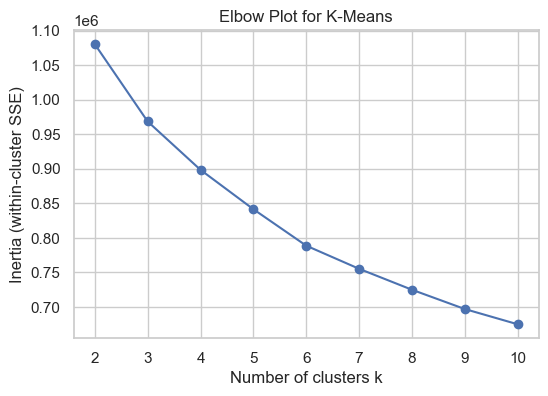

In [8]:
from sklearn.cluster import KMeans

inertias = []
k_values = range(2, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertias, marker="o")
plt.xticks(k_values)
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow Plot for K-Means")

savefig("kmeans_elbow.png")
plt.show()

In [9]:
best_k = 4  # adjust after you inspect the elbow plot
km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = km.fit_predict(X_scaled)

X_km = X.copy()
X_km["cluster"] = clusters
X_km.head()

,height_inches,weight_lbs,bmi,bust_band,cup_size_num,age,body_type_num,rented_for_num,rating,cluster
0,68.0,137.0,20.828503,34.0,4.0,28.0,3.0,6.0,10.0,2
1,66.0,132.0,21.303030,34.0,2.0,36.0,6.0,3.0,10.0,1
3,65.0,135.0,22.462722,34.0,3.0,34.0,4.0,2.0,8.0,3
4,69.0,145.0,21.410418,34.0,2.0,27.0,1.0,7.0,10.0,2
5,68.0,138.0,20.980536,32.0,2.0,45.0,1.0,0.0,8.0,3


In [10]:
centroids_scaled = km.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

centroids_df = pd.DataFrame(centroids_original, columns=num_cols)
centroids_df["cluster"] = range(best_k)
centroids_df

,height_inches,weight_lbs,bmi,bust_band,cup_size_num,age,body_type_num,rented_for_num,rating,cluster
0,65.682366,172.768985,28.209687,36.421710,3.655826,36.025698,2.600798,4.246832,8.962339,0
1,63.946971,118.956733,20.487344,33.044726,2.280772,32.788917,5.028783,4.246445,9.119058,1
2,65.659388,136.233622,22.240307,33.976218,2.973996,33.449936,2.226482,7.173751,9.118131,2
3,65.779434,135.626504,22.056562,33.968436,3.033060,34.655953,2.171605,2.358672,9.082022,3


In [11]:
# align clusters with original df rows (X came from df[num_cols].dropna())
df_km = df.loc[X.index].copy()
df_km["cluster"] = clusters

df_km.groupby("cluster")["fit"].value_counts(normalize=True).unstack().fillna(0)

fit,fit,large,small
cluster,,,
0,0.727019,0.129662,0.143320
1,0.741344,0.132366,0.126290
2,0.737642,0.118640,0.143718
3,0.734775,0.136462,0.128763


In [12]:
# save K-Means cluster assignments (one row per review)
kmeans_clusters = df_km[["user_id", "item_id", "cluster"]].copy()
kmeans_clusters.to_csv("../Data/Processed/kmeans_clusters.csv", index=False)
kmeans_clusters.head()

,user_id,item_id,cluster
0,420272,2260466,2
1,273551,153475,1
3,909926,126335,3
4,151944,616682,2
5,734848,364092,3


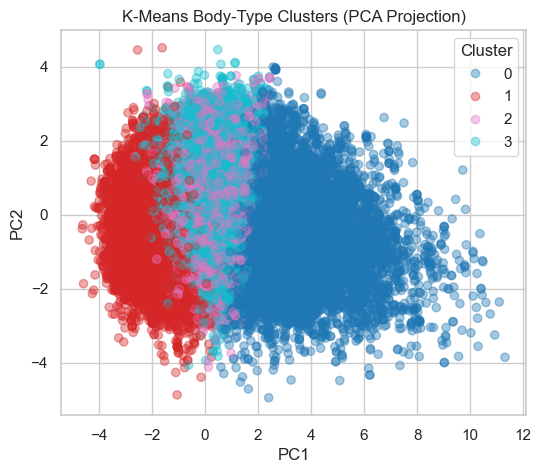

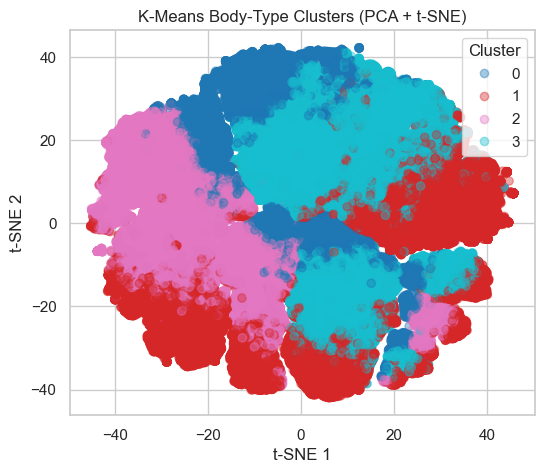

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- PCA 2D projection of K-Means clusters ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="tab10", alpha=0.4)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Body-Type Clusters (PCA Projection)")
plt.legend(*scatter.legend_elements(), title="Cluster")

savefig("kmeans_pca_projection.png")
plt.show()

# --- PCA + t-SNE (PCA-denoised) ---
pca_tsne = PCA(n_components=6, random_state=42)
X_pca_tsne = pca_tsne.fit_transform(X_scaled)

tsne = TSNE(
    n_components=2,
    perplexity=40,
    learning_rate=200,
    max_iter=1000,
    init="random",
    random_state=42,
)
X_tsne = tsne.fit_transform(X_pca_tsne)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap="tab10", alpha=0.4)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("K-Means Body-Type Clusters (PCA + t-SNE)")
plt.legend(*scatter.legend_elements(), title="Cluster")

savefig("kmeans_pca_tsne.png")
plt.show()

In [15]:
# save PCA and t-SNE embeddings with K-Means clusters
pca_kmeans_df = pd.DataFrame(
    X_pca, index=X.index, columns=["pc1", "pc2"]
)
pca_kmeans_df["cluster"] = clusters
pca_kmeans_df.to_csv("../Data/Processed/kmeans_pca_projection.csv", index=True)

tsne_kmeans_df = pd.DataFrame(
    X_tsne, index=X.index, columns=["tsne1", "tsne2"]
)
tsne_kmeans_df["cluster"] = clusters
tsne_kmeans_df.to_csv("../Data/Processed/kmeans_pca_tsne_projection.csv", index=True)

## K-Means Clustering on Body Measurements

We applied K-Means clustering to the RentTheRunway dataset to uncover latent “body type + usage” segments based purely on numeric measurements and encodings. The features used were:

- `height_inches`, `weight_lbs`, `bmi`, `bust_band`, `cup_size_num`
- `age`, `body_type_num`, `rented_for_num`, `rating`

After dropping rows with missing values on these fields, we standardized all features using `StandardScaler` so that K-Means is not dominated by variables on larger numeric scales (e.g., weight vs. rating). We then fit K-Means for \(k = 2, \dots, 10\) and plotted an elbow curve of inertia (within-cluster sum of squares) versus \(k\). The “elbow” suggested that a small number of clusters captures most of the structure without overfitting, so we selected \(k = 4\) as a reasonable trade-off between model simplicity and within-cluster homogeneity.

With \(k = 4\), we examined the cluster centroids in the original units to interpret the segments (e.g., shorter / lighter vs. taller / heavier, different bust band / cup size combinations, different age ranges). We then joined the cluster assignments back to the original dataframe and cross-tabulated `cluster` against the `fit` outcome (Small / Fit / Large). This allows us to see how fit feedback is distributed within each body-type cluster. In particular, clusters with systematically higher “Small” or “Large” rates highlight customer segments for which current sizing may not work well, motivating targeted size recommendations or additional styles for those body types.